In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "data/by_state/OR/or_extent_1km_grid.shp"
original_grid = gd.read_file(grid_path)
original_grid = original_grid.set_index('id')
grid = original_grid

In [4]:
chg_path = "data/challenger_speed_tests/chg_41_entity_31168_challenger_speed_tests_valid_certified.csv"
chg_data = pd.read_csv(chg_path, parse_dates=['timestamp'])
chg = gd.GeoDataFrame(chg_data, geometry=gd.points_from_xy(chg_data.longitude, chg_data.latitude)).set_crs("EPSG:4326").to_crs(grid.crs)

In [5]:
chg[chg['provider_name'] == 'Verizon Wireless']

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,provider_name,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
18910,44.025678,-117.074261,2018-05-30 14:59:34-06:00,-92.25,0.000000,0,70,Verizon Wireless,73,2218,2,XCAL-M,23.21.101.24,31168,41,1252,2370,POINT (-13032647.120 5469416.773)
18913,44.025614,-117.074414,2018-05-30 14:59:35-06:00,0.00,0.000000,0,70,Verizon Wireless,73,2218,2,XCAL-M,23.21.101.24,31168,41,1252,2370,POINT (-13032664.151 5469406.865)
18917,44.025534,-117.074562,2018-05-30 14:59:36-06:00,-94.31,0.000000,0,70,Verizon Wireless,73,2218,2,XCAL-M,23.21.101.24,31168,41,1252,2370,POINT (-13032680.627 5469394.479)
18922,44.025471,-117.074692,2018-05-30 14:59:37-06:00,-93.16,0.000000,0,70,Verizon Wireless,73,2218,2,XCAL-M,23.21.101.24,31168,41,1252,2370,POINT (-13032695.098 5469384.726)
18927,44.025400,-117.074818,2018-05-30 14:59:38-06:00,-93.74,0.000000,0,70,Verizon Wireless,73,2218,2,XCAL-M,23.21.101.24,31168,41,1252,2370,POINT (-13032709.124 5469373.734)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226294,45.620402,-117.793188,2018-10-31 18:56:22-07:00,-112.84,3.900260,0,70,Verizon Wireless,73,1537,2,XCAL-M,23.21.101.24,31168,41,1237,2556,POINT (-13112677.707 5719725.653)
1226297,45.620235,-117.793200,2018-10-31 18:56:23-07:00,-110.97,2.799180,0,70,Verizon Wireless,73,1537,2,XCAL-M,23.21.101.24,31168,41,1237,2556,POINT (-13112679.043 5719699.073)
1226299,45.620073,-117.793221,2018-10-31 18:56:24-07:00,-107.92,8.198710,0,70,Verizon Wireless,73,1537,2,XCAL-M,23.21.101.24,31168,41,1237,2556,POINT (-13112681.381 5719673.289)
1226301,45.619919,-117.793243,2018-10-31 18:56:25-07:00,-111.02,8.750877,0,70,Verizon Wireless,73,1537,2,XCAL-M,23.21.101.24,31168,41,1237,2556,POINT (-13112683.830 5719648.778)


In [6]:
chg.groupby('provider_name').count()

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
provider_name,,,,,,,,,,,,,,,,,
AT&T,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118,295118
Sprint,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654,59654
T-Mobile GS8-Active,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585,421585
Verizon Wireless,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947,449947


In [7]:
verizon_path = "data/by_state/OR/carriers/or_extent_verizon.shp"
verizon = gd.read_file(verizon_path).to_crs(grid.crs)

<AxesSubplot:>

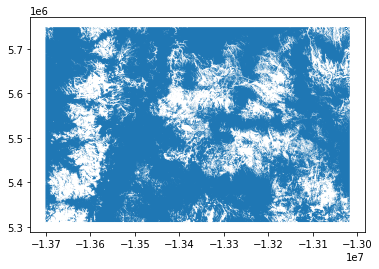

In [8]:
verizon.plot()

In [9]:
# 0 is no signal strength, and in future calculations we consider 
# -120 signal strength to be no signal. As we use median power 
# the impacts to the mean this causes do not matter.
chg['signal_strength'] = chg['signal_strength'].replace(0,-120)

In [10]:
# this lables every point with a grid ID, collecting the grid IDs
# that have extant measurements
chg_grid = gd.sjoin(chg, grid, how='left', op='within')

In [11]:
chg_grid.groupby('index_right').median()['signal_strength']

index_right
130.0      -115.975
131.0      -106.430
1010.0      -99.715
1011.0     -104.800
1012.0      -96.780
             ...   
298996.0    -87.690
298997.0    -96.680
298998.0    -83.085
299434.0   -103.940
299437.0    -85.680
Name: signal_strength, Length: 3119, dtype: float64

In [12]:
grid['med_rxpwr'] = chg_grid.groupby('index_right').median()['signal_strength']
grid = grid.dropna()

In [13]:
original_grid['centroid'] = original_grid['geometry'].centroid
original_grid = original_grid.set_geometry('centroid')
fcc_grid = gd.sjoin(original_grid, verizon, how="left", op="within").dropna()
original_grid = original_grid.set_geometry('geometry')
original_grid = original_grid.drop('centroid', axis=1)

In [14]:
grid['chg_coverage'] = grid['med_rxpwr'] > -110
grid['verizon_coverage'] = grid.index.isin(fcc_grid.index)

In [15]:
grid.to_file("./data/by_state/OR/or_extent_coverage.shp")

In [16]:
grid

,left,top,right,bottom,geometry,med_rxpwr,chg_coverage,verizon_coverage
id,,,,,,,,
130.0,-1.370092e+07,5.619686e+06,-1.369992e+07,5.618686e+06,"POLYGON ((-13700919.062 5619685.577, -13699919...",-115.975,False,True
131.0,-1.370092e+07,5.618686e+06,-1.369992e+07,5.617686e+06,"POLYGON ((-13700919.062 5618685.577, -13699919...",-106.430,True,True
1010.0,-1.369892e+07,5.615686e+06,-1.369792e+07,5.614686e+06,"POLYGON ((-13698919.062 5615685.577, -13697919...",-99.715,True,True
1011.0,-1.369892e+07,5.614686e+06,-1.369792e+07,5.613686e+06,"POLYGON ((-13698919.062 5614685.577, -13697919...",-104.800,True,True
1012.0,-1.369892e+07,5.613686e+06,-1.369792e+07,5.612686e+06,"POLYGON ((-13698919.062 5613685.577, -13697919...",-96.780,True,True
...,...,...,...,...,...,...,...,...
298996.0,-1.301892e+07,5.469686e+06,-1.301792e+07,5.468686e+06,"POLYGON ((-13018919.062 5469685.577, -13017919...",-87.690,True,True
298997.0,-1.301892e+07,5.468686e+06,-1.301792e+07,5.467686e+06,"POLYGON ((-13018919.062 5468685.577, -13017919...",-96.680,True,True
298998.0,-1.301892e+07,5.467686e+06,-1.301792e+07,5.466686e+06,"POLYGON ((-13018919.062 5467685.577, -13017919...",-83.085,True,True


In [17]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [20]:
confusion_matrix = pd.crosstab(grid['chg_coverage'], grid['verizon_coverage'], rownames=['Challenger Cover'], colnames=['FCC 477 Verizon Coverage'])
print (confusion_matrix)

FCC 477 Verizon Coverage  False  True 
Challenger Cover                      
False                       126   1534
True                          0   1459


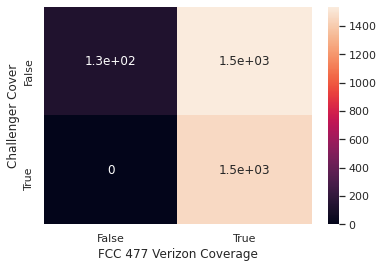

In [21]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()